# 可视化表面
在这个笔记本中，我们从一个胚胎样体的3D数据集创建了一个表面网格。所使用的示例数据源自 [AV Luque 和 JV Veenvliet (2023)](https://zenodo.org/record/7603081#.Y94N4XbMJmN)，遵循 [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode) 许可。关于如何从原始成像数据创建表面，请参见 [creating_surfaces](creating_surfaces.ipynb)。

我们使用 napari-process-points-and-surfaces、[vedo](https://vedo.embl.es/) 和 [napari](https://napari.org) 来可视化表面。

In [1]:
import napari_process_points_and_surfaces as nppas

import vedo
import napari

In [2]:
surface = nppas.gastruloid()

The nppas gastruloid example is derived from AV Luque and JV Veenvliet (2023) which is licensed CC-BY (https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081


在Jupyter笔记本中，结果对象的可视化如下：

(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64))
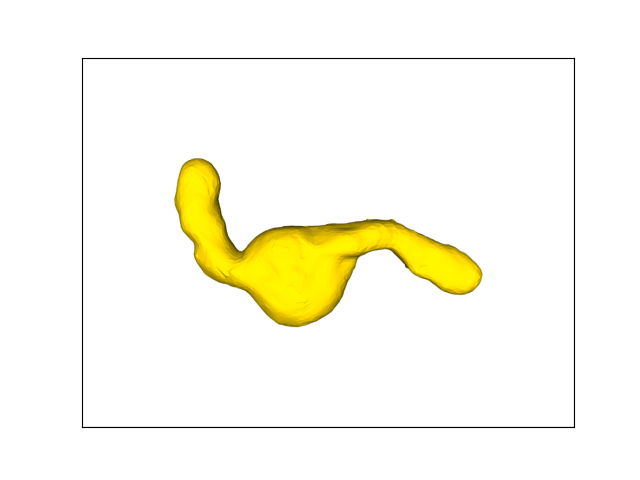

In [3]:
surface

(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64),
 array([0.00025724, 0.00025043, 0.0002532 , ..., 0.00016264, 0.00015164,
        0.00016288]))
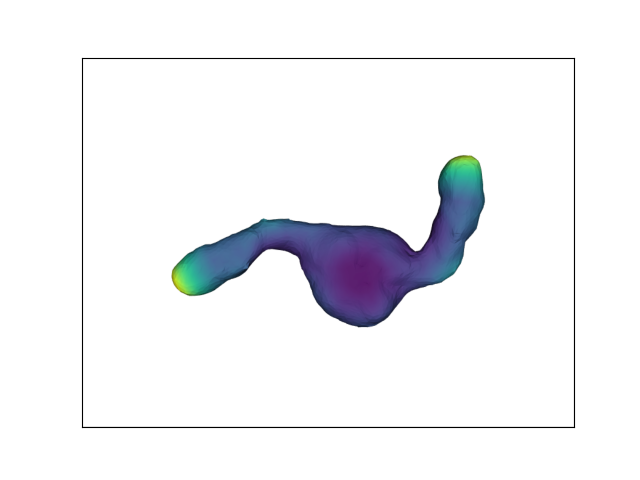
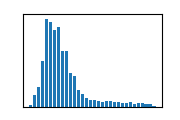

In [4]:
surface2 = nppas.add_quality(surface, nppas.Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL)
surface2.azimuth = -90
surface2

## 使用 napari-process-points-and-surfaces 的 `nazimuths.show()` 可视化表面
你可以使用 `nppas.show()` 来调整可视化效果。

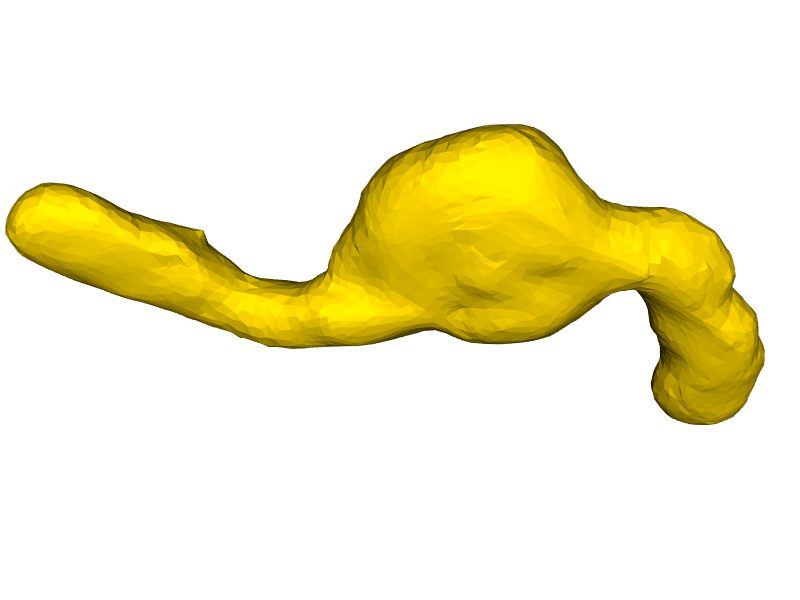

In [5]:
nppas.show(surface, zoom=1.5, azimuth=90, elevation=45)

## 使用 vedo 可视化表面
... 使用 [vedo Plotter](https://vedo.embl.es/autodocs/content/vedo/vedo/plotter.html#Plotter)。


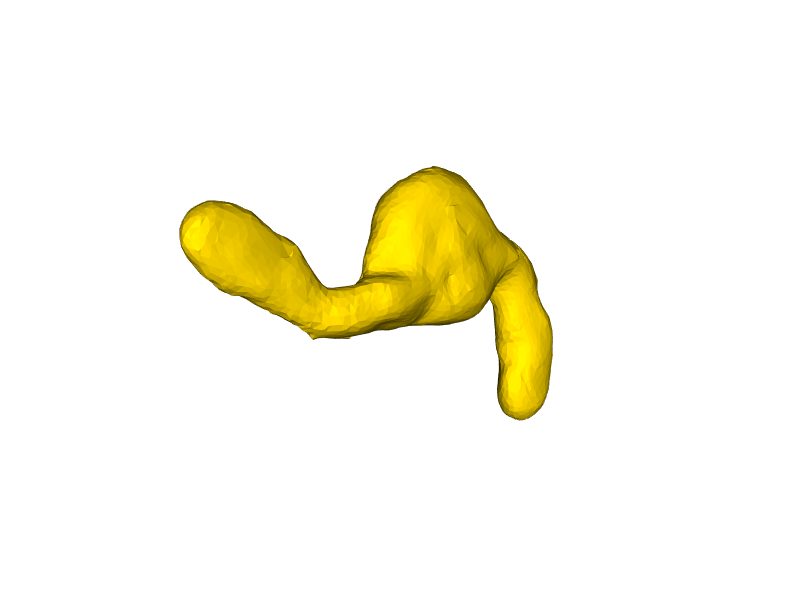

In [6]:
from vedo import Plotter

plt = Plotter()
mesh = nppas.to_vedo_mesh(surface)

plt.show(mesh, zoom=1, azimuth=45)

## 使用 napari 可视化表面


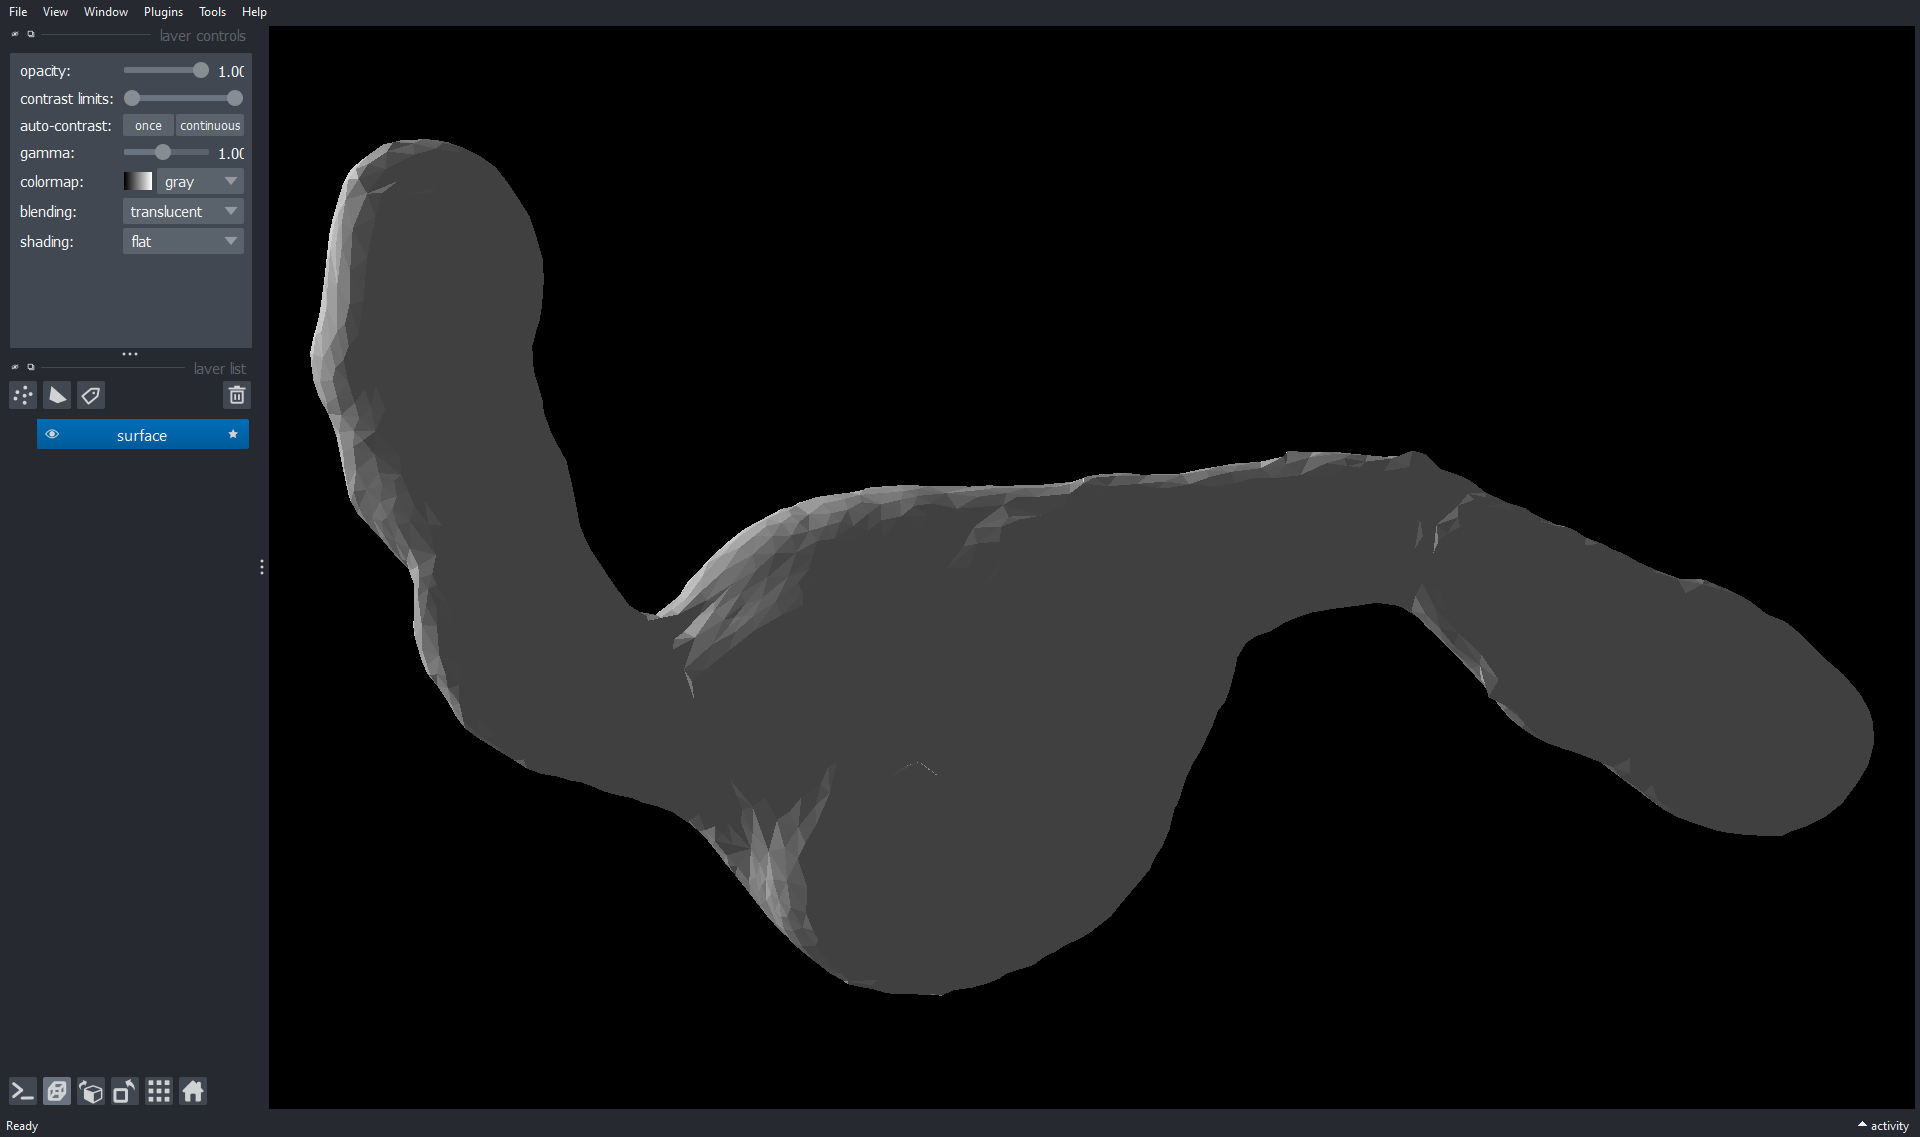

In [7]:
import napari
viewer = napari.Viewer(ndisplay=3)

viewer.add_surface(surface)

napari.utils.nbscreenshot(viewer)

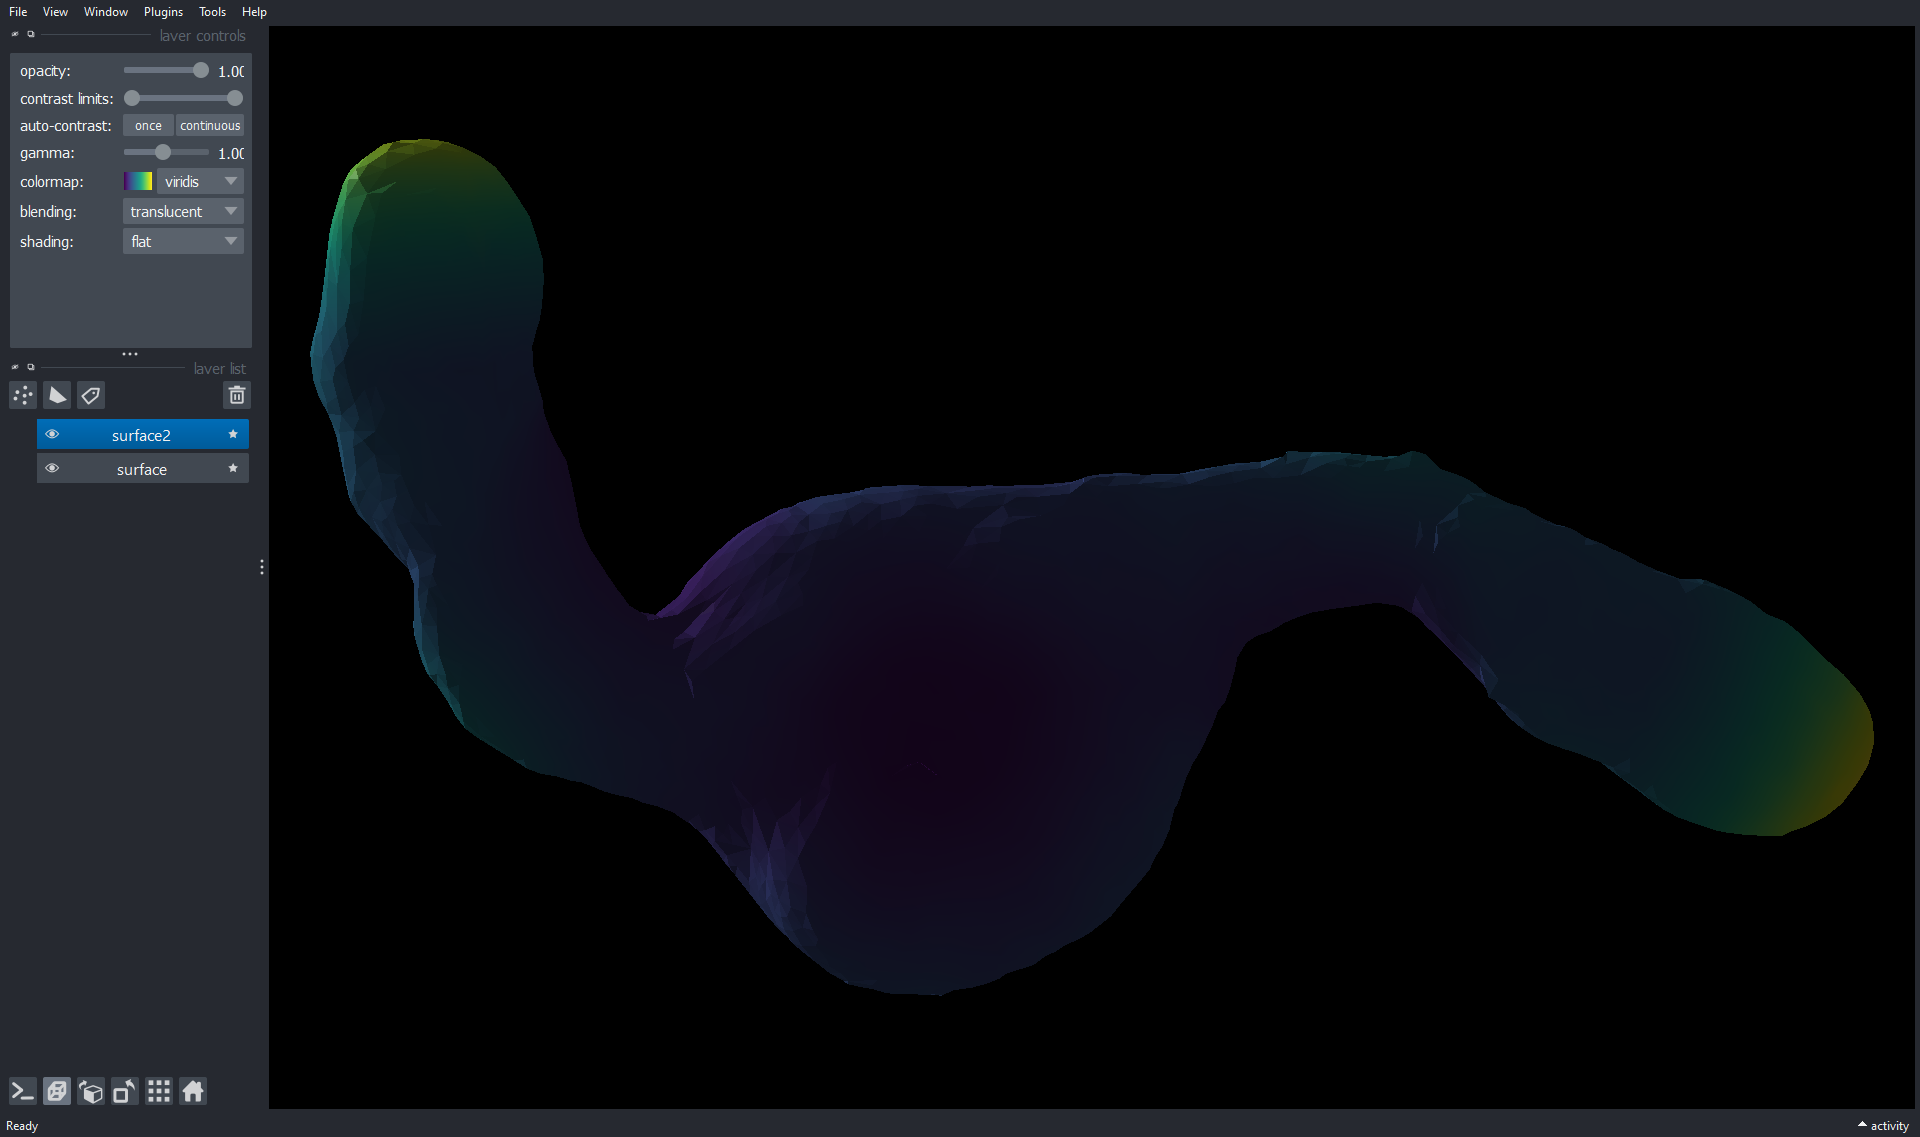

In [8]:

viewer.add_surface(surface2, colormap=surface2.cmap)

napari.utils.nbscreenshot(viewer)